<a href="https://colab.research.google.com/github/PhamTuanKiet02/report/blob/main/10VNdishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from os import listdir
import numpy as np
from numpy import asarray, save
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the images
folder = '/content/drive/MyDrive/10VNdishes/'

# Define the labels for each type of image
labels_dict = {
    'comtam': 0,
    'nui': 1,
    'chebuoi': 2,
    'bundaumamtom': 3,
    'bunthitnuong': 4,
    'botchien': 5,
    'banhxeo': 6,
    'banhuot': 7,
    'banhmithit': 8,
    'hutieu': 9
}

photos, labels = list(), list()
for file in listdir(folder):
    for label, output in labels_dict.items():
        if file.startswith(label):
            photo = load_img(folder + file, target_size=(100,130))
            photo = img_to_array(photo)
            photos.append(photo)
            labels.append(output)
            break

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

# Save the images and labels as numpy arrays
save('10foods_photos.npy', photos)
save('10foods_labels.npy', labels)

# Define and compile the model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100,130, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='softmax'))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(photos, labels, epochs=16, batch_size=30, verbose=1)

# Evaluate the model
model.evaluate(photos,labels)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(19, 100, 130, 3) (19,)
Epoch 1/16
1/1 [==============================] - 13s 13s/step - loss: 328.5028 - accuracy: 0.0526
Epoch 2/16
1/1 [==============================] - 0s 26ms/step - loss: 6819.7759 - accuracy: 0.1053
Epoch 3/16
1/1 [==============================] - 0s 20ms/step - loss: 6712.1899 - accuracy: 0.0000e+00
Epoch 4/16
1/1 [==============================] - 0s 22ms/step - loss: 4222.8608 - accuracy: 0.0526
Epoch 5/16
1/1 [==============================] - 0s 25ms/step - loss: 1668.8707 - accuracy: 0.0000e+00
Epoch 6/16
1/1 [==============================] - 0s 23ms/step - loss: 1032.9669 - accuracy: 0.1579
Epoch 7/16
1/1 [==============================] - 0s 23ms/step - loss: 599.3307 - accuracy: 0.1579
Epoch 8/16
1/1 [==============================] - 0s 20ms/step - loss: 447.2787 - accuracy: 0.1053
Epoch 9/16
1/1 [==========================

[1.060141682624817, 0.8421052694320679]

In [ ]:
model.save('10VNdishes.h5')

In [ ]:
classes = ["comtam","nui","chebuoi","bundaumamtom","bunthitnuong","botchien","banhxeo","banhuot","banhmithit","hutieu"]

1/1 [==============================] - 0s 18ms/step
[[0.01722004 0.01924708 0.01869124 0.01953172 0.01616432 0.01766044
  0.01982372 0.01793629 0.01767394 0.02028856 0.01606089 0.01417254
  0.01457528 0.01867574 0.01438903 0.01548205 0.01478978 0.01830174
  0.01552607 0.0148064  0.01527478 0.01188382 0.01478874 0.01648861
  0.0147165  0.01632892 0.01292669 0.01427456 0.01502598 0.01579008
  0.01525963 0.01442882 0.01520805 0.01333155 0.01590008 0.01652498
  0.01778377 0.01415349 0.01386502 0.01421608 0.01577959 0.01729238
  0.01456869 0.01656137 0.01329633 0.01678549 0.01521332 0.01257968
  0.0175322  0.01716306 0.01754252 0.01330064 0.01219851 0.01459093
  0.01430496 0.01275506 0.01323315 0.01292901 0.01689947 0.01506494
  0.0128144  0.01547912 0.0163488  0.01657932]]


'hutieu'

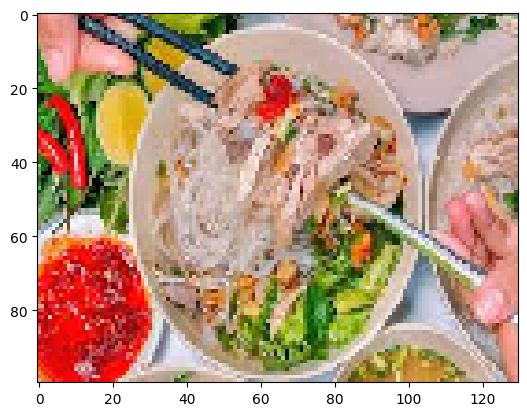

In [ ]:
img = load_img('/content/drive/MyDrive/nhandangmonan/hutieu.jpg', target_size=(100,130))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,100,130,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]